<a href="https://colab.research.google.com/github/Forcesaj/GA_MLR/blob/main/3_Testing_2_(Most_Close_Prediction)Prediksi_Saham_Menggunakan_Algoritma_Genetika_dan_Regresi_BBRI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving BBRI.JK(RAW) - Copy.csv to BBRI.JK(RAW) - Copy (4).csv


In [ ]:
import pandas as pd                      # pandas table
import matplotlib.pyplot as plt          # plotting
import numpy as np                       # dense matrices
import io
df_dataset = pd.read_csv(io.BytesIO(uploaded['BBRI.JK(RAW) - Copy.csv']), names=['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close','Volume'], header=None)
# Dataset is now stored in a Pandas Dataframe00
df_dataset #uncomment for table

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-14,2125.0,2145.0,2085.0,2135.0,1392.874634,146158000
1,2015-12-15,2130.0,2150.0,2115.0,2150.0,1402.660522,90476500
2,2015-12-16,2175.0,2270.0,2170.0,2270.0,1480.948608,148357500
3,2015-12-17,2310.0,2320.0,2300.0,2310.0,1507.044678,147026000
4,2015-12-18,2245.0,2265.0,2175.0,2175.0,1418.970581,131712000
...,...,...,...,...,...,...,...
1257,2020-12-07,4350.0,4420.0,4350.0,4400.0,4400.000000,140849600
1258,2020-12-08,4400.0,4400.0,4340.0,4400.0,4400.000000,81272000
1259,2020-12-09,4400.0,4400.0,4400.0,4400.0,4400.000000,0
1260,2020-12-10,4450.0,4450.0,4330.0,4330.0,4330.000000,193630600


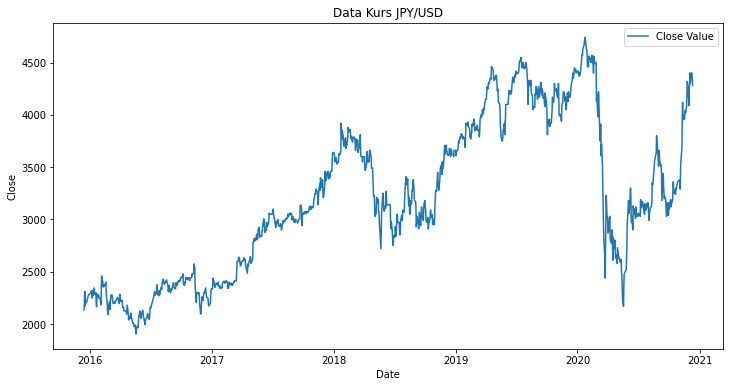

In [ ]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt
import csv
import datetime

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'))
  close.append(df_dataset.at[x,'Close'])

plt.figure(figsize=(12,6))
plt.plot(date,close ,label='Close Value')
plt.xlabel('Date')
plt.ylabel('Close')

plt.title('Data Kurs JPY/USD')
plt.legend()
plt.show()

In [ ]:
import random

SLIDE_WINDOWS = 5
POP_SIZE = 500  #disarankan genap
GENE_LENGTH = SLIDE_WINDOWS + 1

populasi = []

# membuat individu sebanyakk populasi awal
for x in range(POP_SIZE):
    individu = {}
    #membuat nilai random untuk setiap gen
    for y in range(GENE_LENGTH):      
      individu['thetha'+ str(y)] = random.random()
    populasi.append(individu)

# menampilkan populasi
df_koef = pd.DataFrame(list(populasi))
df_koef

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5
0,0.539354,0.666104,0.020482,0.710197,0.908459,0.975766
1,0.503500,0.920072,0.918517,0.495051,0.217333,0.816204
2,0.703955,0.749364,0.250017,0.998230,0.093204,0.729771
3,0.896644,0.051096,0.790203,0.374487,0.483963,0.910210
4,0.145936,0.544760,0.545229,0.049670,0.023535,0.252991
...,...,...,...,...,...,...
495,0.553872,0.914367,0.043433,0.815437,0.029830,0.117453
496,0.343976,0.274283,0.425549,0.575914,0.332684,0.423185
497,0.640655,0.129866,0.011247,0.620741,0.084704,0.360517
498,0.701375,0.004635,0.089644,0.493645,0.360814,0.566096


In [ ]:
from decimal import *
getcontext().prec = 5

# menghitung MLR ===============================================================
def get_MLR(index_individu, hari_mulai):

  MLR = df_koef.iat[index_individu,0]
  # MLR = koefisien 0
  hari_ke = hari_mulai

  for y in range(SLIDE_WINDOWS):
    # MLR = MLR + kefisien * data    
    MLR = MLR + df_koef.iat[index_individu,y+1] * df_dataset.at[hari_ke,'Close']
    hari_ke += 1
  
  return MLR
#===============================================================================

# menghitung MSE ===============================================================
def get_MSE(index_individu) :
  total_square_error = 0
  end = len(df_dataset) - SLIDE_WINDOWS

  for x in range(end):
    # menghitung square error
    square_error = np.power( get_MLR(index_individu,x) - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
    total_square_error += square_error
  
  mse = (1 / (len(df_dataset) - SLIDE_WINDOWS)) * total_square_error
  return mse
# ==============================================================================

# menghitung fitness ===========================================================
fitness_individu = []
end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)
# ==============================================================================

# membuat data frame individu yaitu data koefisien + fitness ===================
df_individu = df_koef.assign(fitness = fitness_individu) 
df_individu

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness
0,0.539354,0.666104,0.020482,0.710197,0.908459,0.975766,1.772090e-08
1,0.503500,0.920072,0.918517,0.495051,0.217333,0.816204,1.647017e-08
2,0.703955,0.749364,0.250017,0.998230,0.093204,0.729771,2.784017e-08
3,0.896644,0.051096,0.790203,0.374487,0.483963,0.910210,3.556852e-08
4,0.145936,0.544760,0.545229,0.049670,0.023535,0.252991,5.325938e-07
...,...,...,...,...,...,...,...
495,0.553872,0.914367,0.043433,0.815437,0.029830,0.117453,1.090255e-07
496,0.343976,0.274283,0.425549,0.575914,0.332684,0.423185,8.672283e-08
497,0.640655,0.129866,0.011247,0.620741,0.084704,0.360517,2.128962e-06
498,0.701375,0.004635,0.089644,0.493645,0.360814,0.566096,3.474671e-07


In [ ]:
total_fitness = df_individu['fitness'].sum()
list_probabilitas = []

for x in range(len(df_individu)):
  nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
  list_probabilitas.append(nilai_probabilitas)
  
# membuat data frame individu yaitu data koefisien + fitness
df_individu = df_individu.assign(probabilitas = list_probabilitas)
df_individu

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness,probabilitas
0,0.539354,0.666104,0.020482,0.710197,0.908459,0.975766,1.772090e-08,0.000081
1,0.503500,0.920072,0.918517,0.495051,0.217333,0.816204,1.647017e-08,0.000076
2,0.703955,0.749364,0.250017,0.998230,0.093204,0.729771,2.784017e-08,0.000128
3,0.896644,0.051096,0.790203,0.374487,0.483963,0.910210,3.556852e-08,0.000163
4,0.145936,0.544760,0.545229,0.049670,0.023535,0.252991,5.325938e-07,0.002443
...,...,...,...,...,...,...,...,...
495,0.553872,0.914367,0.043433,0.815437,0.029830,0.117453,1.090255e-07,0.000500
496,0.343976,0.274283,0.425549,0.575914,0.332684,0.423185,8.672283e-08,0.000398
497,0.640655,0.129866,0.011247,0.620741,0.084704,0.360517,2.128962e-06,0.009767
498,0.701375,0.004635,0.089644,0.493645,0.360814,0.566096,3.474671e-07,0.001594


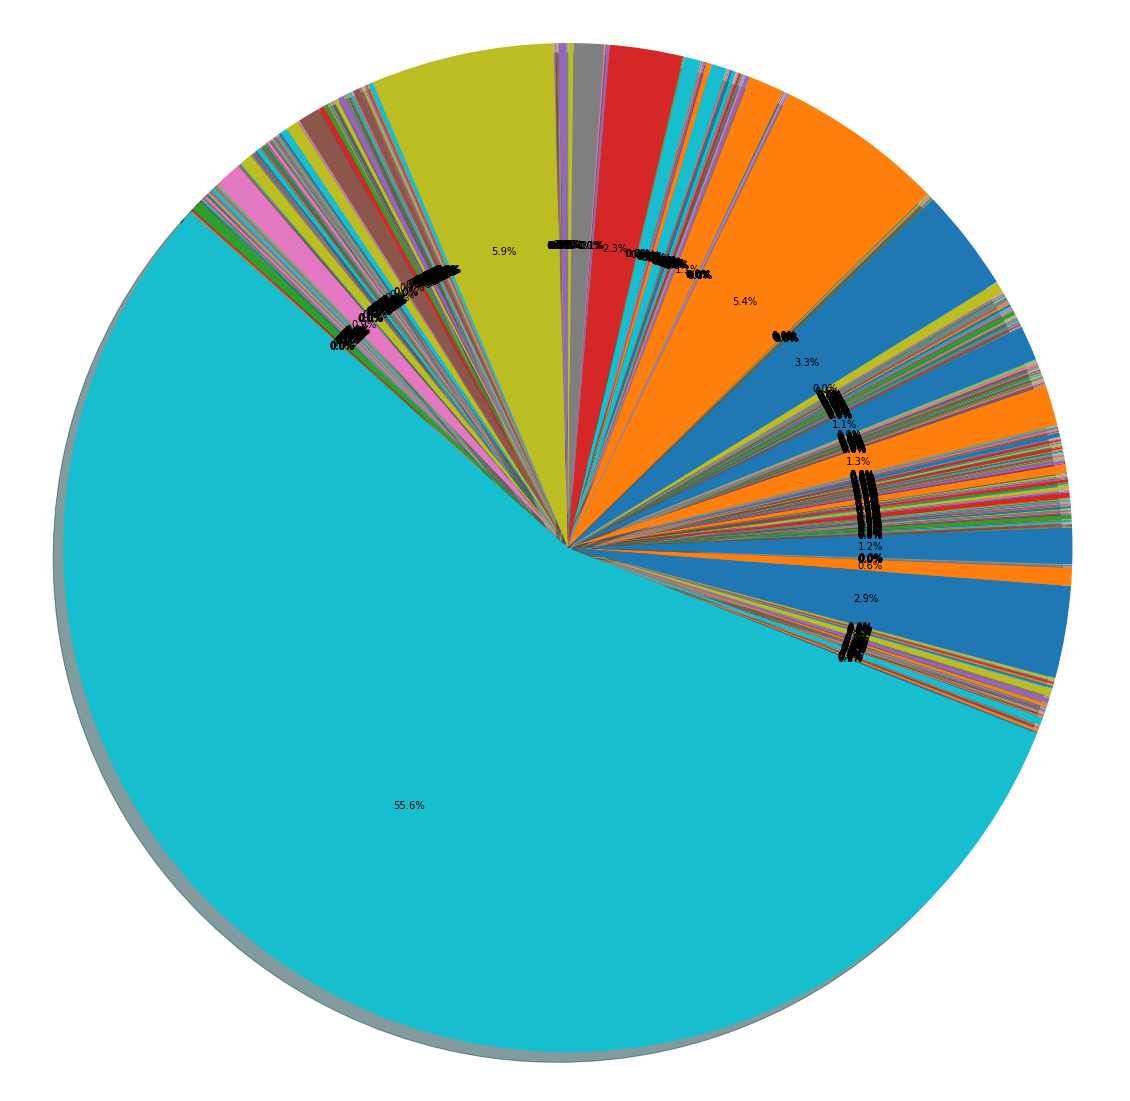

In [ ]:
sizes = df_individu['probabilitas']

fig1, ax1 = plt.subplots(figsize=(20,20))
ax1.pie(sizes,  autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
#fungsi select
def get_select(df_populasi):
  
  r = random.random()
  #pointer pada roulette wheel
  partialsum = 0
  
  for x in range(len(df_populasi)):
    partialsum += df_populasi.at[x,'probabilitas']
    
    if partialsum > r:
      return x

terpilih = []

for y in range(len(df_individu)):
  pilih = get_select(df_individu)
  terpilih.append(pilih)

series_terpilih = pd.Series(terpilih)

# menampilkan individu terpilih
# series_terpilih

generasi_baru = []

for z in range(len(series_terpilih)):
  generasi_baru.append(df_individu.iloc[series_terpilih[z]])

generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
generasi_baru

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness,probabilitas
0,0.663580,0.975743,0.516713,0.345439,0.127708,0.106419,8.039757e-08,0.000369
1,0.928813,0.233771,0.281695,0.054376,0.321342,0.031530,1.278792e-05,0.058670
2,0.327050,0.907727,0.403236,0.391285,0.302400,0.021115,8.781966e-08,0.000403
3,0.317857,0.460432,0.331642,0.195678,0.058451,0.069407,6.425103e-06,0.029478
4,0.762102,0.113924,0.222925,0.258978,0.062352,0.340495,1.210947e-04,0.555570
...,...,...,...,...,...,...,...,...
495,0.762102,0.113924,0.222925,0.258978,0.062352,0.340495,1.210947e-04,0.555570
496,0.762102,0.113924,0.222925,0.258978,0.062352,0.340495,1.210947e-04,0.555570
497,0.762102,0.113924,0.222925,0.258978,0.062352,0.340495,1.210947e-04,0.555570
498,0.762102,0.113924,0.222925,0.258978,0.062352,0.340495,1.210947e-04,0.555570


In [ ]:
#tentukan nilai alfha
alfha = 0.4

list_offspring = []

#whole arithmetic crossover=============================================
def cross_over(p1,p2,list_offspring):
  
  offspring1 = {}
  for x in range(SLIDE_WINDOWS+1):
    offspring1['thetha'+ str(x)] = alfha*p1.iat[x] + (1-alfha)*p2.iat[x]
  list_offspring.append(offspring1)

  offspring2 = {}
  for x in range(SLIDE_WINDOWS+1):
    offspring2['thetha'+ str(x)] = alfha*p2.iat[x] + (1-alfha)*p1.iat[x]
  list_offspring.append(offspring2)

#prob cross ==============================================================
probabilitas_crossover = 0.6
jumlah_parent = round(len(generasi_baru) * probabilitas_crossover)
#=========================================================================

#melakukan crossover
for x in range(jumlah_parent):
  #jika ganjil jadi parent 1
  if ((x+1) % 2) == 1:
    parent1 = generasi_baru.iloc[x]
  #jika ganjil jadi parent 2
  if ((x+1) % 2) == 0:
    parent2 = generasi_baru.iloc[x]
    #jika parent sudah 2 bisa di crossover
    cross_over(parent1,parent2,list_offspring)

hasil_anak = pd.DataFrame(list_offspring)

#update generasi baru=======================================================
generasi_baru = generasi_baru.drop("fitness", axis=1)
generasi_baru = generasi_baru.drop("probabilitas", axis=1)
generasi_baru.update(hasil_anak)
#===========================================================================
print(generasi_baru)

      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5
0    0.822719  0.530560  0.375703  0.170801  0.243888  0.061486
1    0.769673  0.678954  0.422706  0.229013  0.205162  0.076464
2    0.321534  0.639350  0.360279  0.273921  0.156031  0.050090
3    0.323373  0.728809  0.374598  0.313042  0.204820  0.040432
4    0.387940  0.320009  0.289172  0.277267  0.585644  0.543491
..        ...       ...       ...       ...       ...       ...
495  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
496  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
497  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
498  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
499  0.818804  0.156257  0.039922  0.192685  0.259338  0.484492

[500 rows x 6 columns]


In [ ]:
probabilitas_jumlah_terpilih = 0.2
banyak_yang_terpilih = round(POP_SIZE * probabilitas_jumlah_terpilih)

# memilih individu =============================================================
indeks_terpilih = []

for x in range(banyak_yang_terpilih):
  r = random.randint(0, len(generasi_baru)-1)
  if (x) == 0:    
    indeks_terpilih.append(r)
  else:
    # untuk menghindari duplikat
    while r in indeks_terpilih:
      r = random.randint(0, len(generasi_baru)-1)
    indeks_terpilih.append(r)
# ==============================================================================

# mutasi =======================================================================
for x in range(len(indeks_terpilih)):
  #menentukan index gene yang dirubah
  igen_change = random.randint(0, GENE_LENGTH-1)
  
  #angka random dari 0.1 - 1.1 (pengubah nilai gen)
  gene_changer = random.uniform(0.1, 1.1)
  
  #merubah gen
  gene_change = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer
  
  #update gene
  generasi_baru.iloc[indeks_terpilih[x],igen_change] = gene_change
#===============================================================================

print(generasi_baru)

      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5
0    0.822719  0.530560  0.375703  0.175122  0.243888  0.061486
1    0.625870  0.678954  0.422706  0.229013  0.205162  0.076464
2    0.321534  0.639350  0.360279  0.273921  0.156031  0.050090
3    0.323373  0.728809  0.374598  0.313042  0.204820  0.040432
4    0.387940  0.320009  0.289172  0.277267  0.585644  0.543491
..        ...       ...       ...       ...       ...       ...
495  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
496  0.762102  0.113924  0.222925  0.167130  0.062352  0.340495
497  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
498  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495
499  0.818804  0.156257  0.039922  0.087625  0.259338  0.484492

[500 rows x 6 columns]


In [ ]:
# menghitung fitness ===========================================================
fitness_individu = []

end = len(df_koef)

for z in range(end) :
  fitness = 1 / (get_MSE(z) + 1 )
  fitness_individu.append(fitness)

# membuat data frame individu yaitu data koefisien + fitness
generasi_baru = generasi_baru.assign(fitness = fitness_individu) 

# elitism dengan metode state update ============================================
#mengahpus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
df_individu = df_individu.drop(['probabilitas'], axis=1)

# menggabungkan populasi lama dengan yang baru
df_individu = df_individu.append(generasi_baru)

# rangking individu sesuai fitness
df_individu = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)

#hanya ambil individu sebanyak populasi size
df_individu = df_individu[:POP_SIZE]

#etilism dengan metode golland =================================================
#df_individu = generasi_baru
print(df_individu)

      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5       fitness
0    0.762102  0.113924  0.222925  0.258978  0.062352  0.340495  1.210947e-04
1    0.231028  0.130763  0.169434  0.024311  0.615586  0.169578  1.210947e-04
2    0.762102  0.113924  0.222925  0.258978  0.062352  0.340495  1.278792e-05
3    0.928813  0.233771  0.281695  0.054376  0.321342  0.031530  1.278792e-05
4    0.317857  0.460432  0.331642  0.195678  0.058451  0.069407  1.182667e-05
..        ...       ...       ...       ...       ...       ...           ...
495  0.721323  0.046769  0.002752  0.647273  0.078154  0.415464  3.893448e-08
496  0.784783  0.130857  0.149724  0.232461  0.141146  0.309182  3.836957e-08
497  0.908957  0.494737  0.977459  0.351334  0.172321  0.555117  3.836957e-08
498  0.762102  0.113924  0.089227  0.258978  0.062352  0.340495  3.822686e-08
499  0.488288  0.092691  0.475663  0.596610  0.753287  0.634790  3.822686e-08

[500 rows x 7 columns]


In [ ]:
best_kromosom = df_individu.iloc[0]
best_kromosom

thetha0    0.762102
thetha1    0.113924
thetha2    0.222925
thetha3    0.258978
thetha4    0.062352
thetha5    0.340495
fitness    0.000121
Name: 0, dtype: float64

In [ ]:
#constraint
#tentukan banyaknya iterasi
ITERATE = 20
#fitness yang diharapkan
CONSTRAINT_FITNESS = 0.8


# fungsi hitung fitness==========================================================
def get_fitness(df_koef):
  
  # menghitung fitness =========================================================
  fitness_individu = []
  end = len(df_koef)

  for z in range(end) :
    fitness = 1 / (get_MSE(z) + 1 )
    fitness_individu.append(fitness)

  # membuat data frame individu yaitu data koefisien + fitness
  df_koef = df_koef.assign(fitness = fitness_individu) 
  return df_koef
# ==============================================================================

# fungsi hitung probabilitas:====================================================
def get_probabilitas(df_individu):
  
  total_fitness = df_individu['fitness'].sum()
  list_probabilitas = []

  for x in range(len(df_individu)):
    nilai_probabilitas = df_individu.at[x,'fitness'] / total_fitness
    list_probabilitas.append(nilai_probabilitas)

  # membuat data frame individu yaitu data koefisien + fitness
  df_individu = df_individu.assign(probabilitas = list_probabilitas)
  return df_individu
# ==============================================================================

#fungsi seleksi=================================================================
def get_seleksi(df_individu):
  
  terpilih = []

  for y in range(len(df_individu)):
    pilih = get_select(df_individu)
    terpilih.append(pilih)

  series_terpilih = pd.Series(terpilih)
  # menampilkan individu terpilih
  series_terpilih
  generasi_baru = []

  for z in range(len(series_terpilih)):
    generasi_baru.append(df_individu.iloc[series_terpilih[z]])

  generasi_baru = pd.DataFrame(generasi_baru).reset_index(drop=True)
  return generasi_baru
#===============================================================================

# fungsi crossover==============================================================
def get_crossover(generasi_baru):
  
  #tentukan nilai alfha
  alfha = 0.4
  list_offspring = []

  #melakukan crossover
  for x in range(len(generasi_baru)):
    
    #jika ganjil jadi parent 1
    if ((x+1) % 2) == 1:
      parent1 = generasi_baru.iloc[x]
      
    #jika ganjil jadi parent 2
    if ((x+1) % 2) == 0:      
      parent2 = generasi_baru.iloc[x]
      #jika parent sudah 2 bisa di crossover
      cross_over(parent1,parent2,list_offspring)

  generasi_baru = pd.DataFrame(list_offspring)
  return generasi_baru
#===============================================================================

# fungsi mutasi ================================================================
def mutation(generasi_baru, probabilitas, banyak_poppulasi, panjang_gen):
  
  probabilitas_jumlah_terpilih = probabilitas
  banyak_yang_terpilih = round(banyak_poppulasi * probabilitas_jumlah_terpilih)

  # memilih individu =============================
  indeks_terpilih = []

  for x in range(banyak_yang_terpilih):    
    r = random.randint(0, len(generasi_baru)-1)
    
    if (x) == 0:    
      indeks_terpilih.append(r)
    else:
      # untuk menghindari duplikat
      while r in indeks_terpilih:
        r = random.randint(0, len(generasi_baru)-1)
        
      indeks_terpilih.append(r)
  # ===============================================

  # mutasi ========================================
  for x in range(len(indeks_terpilih)):
    #menentukan index gene yang dirubah
    igen_change = random.randint(0, panjang_gen-1)

    #angka random dari 0.1 - 1.1 (pengubah nilai gen)
    gene_changer = random.uniform(0.1, 1.1)

    #merubah gen
    gene_change = generasi_baru.iloc[indeks_terpilih[x],igen_change] * gene_changer

    #update gene
    generasi_baru.iloc[indeks_terpilih[x],igen_change] = gene_change
    return generasi_baru
#===============================================================================

#===============================================================================
def elitism(populasi_lama, generasi_baru):
  populasi_lama = generasi_baru
  # menghitung fitness
  populasi_lama = get_fitness(populasi_lama)
  return populasi_lama
#===============================================================================

#===============================================================================
def elitism_update(populasi_lama, generasi_baru):
  
  # menghitung fitness
  generasi_baru = get_fitness(generasi_baru)
  
  # elitism dengan metode state update ============================================
  #mengahpus probabilitas sebelumnya (axis = 0 baris, 1 kolom)
  populasi_lama = populasi_lama.drop(['probabilitas'], axis=1)

  # menggabungkan populasi lama dengan yang baru
  populasi_lama = populasi_lama.append(generasi_baru)

  # rangking individu sesuai fitness
  populasi_lama = populasi_lama.sort_values(by='fitness', ascending=False).reset_index(drop=True)

  #hanya ambil individu sebanyak populasi size
  populasi_lama = populasi_lama[:POP_SIZE]
  
  return populasi_lama
#===============================================================================

#===============================================================================
def get_best(df_individu):
  best_kromosom = df_individu.iloc[0]                             
  return best_kromosom
#===============================================================================

i = 0
while (i < ITERATE) and (best_kromosom['fitness'] < CONSTRAINT_FITNESS):
  
  # menghitung probabilitas
  df_individu = get_probabilitas(df_individu)
  
  # seleksi individu
  generasi_baru = get_seleksi(df_individu)
  
  # crossover
  generasi_baru = get_crossover(generasi_baru)
  
  #mutasi
  generasi_baru = mutation(generasi_baru, 0.2, POP_SIZE, GENE_LENGTH)
  
  #etilism
  df_individu = elitism_update(df_individu, generasi_baru)
  
  #best individu
  best_kromosom = get_best(df_individu)
  
  i += 1
  
#df_individu = get_fitness(df_individu)
df_individu

,thetha0,thetha1,thetha2,thetha3,thetha4,thetha5,fitness
0,0.762102,0.113924,0.222925,0.258978,0.062352,0.340495,1.210947e-04
1,0.510864,0.151553,0.269364,0.121116,0.413392,0.236814,1.210947e-04
2,0.478703,0.179253,0.287779,0.128188,0.388875,0.168667,1.210947e-04
3,0.425410,0.096883,0.340481,0.191703,0.354354,0.220730,1.210947e-04
4,0.315466,0.315682,0.288890,0.137318,0.274320,0.108215,1.210947e-04
...,...,...,...,...,...,...,...
495,0.322013,0.114558,0.325716,0.112866,0.509724,0.150973,5.341071e-07
496,0.482755,0.095703,0.319638,0.120386,0.673109,0.206451,5.341071e-07
497,0.382661,0.240909,0.270513,0.133499,0.345055,0.163259,5.341071e-07
498,0.612723,0.133102,0.303155,0.172031,0.288761,0.198976,5.341071e-07


In [ ]:
result = df_individu.sort_values(by='fitness', ascending=False).reset_index(drop=True)
best_kromosom = result.iloc[0]
print('individu terbaik yaitu :')
print(best_kromosom)
print('dari :')
print(result)

individu terbaik yaitu :
thetha0    0.762102
thetha1    0.113924
thetha2    0.222925
thetha3    0.258978
thetha4    0.062352
thetha5    0.340495
fitness    0.000121
Name: 0, dtype: float64
dari :
      thetha0   thetha1   thetha2   thetha3   thetha4   thetha5       fitness
0    0.762102  0.113924  0.222925  0.258978  0.062352  0.340495  1.210947e-04
1    0.414568  0.118357  0.340047  0.139129  0.437223  0.159678  1.210947e-04
2    0.510864  0.151553  0.269364  0.121116  0.413392  0.236814  1.210947e-04
3    0.251867  0.209884  0.208364  0.065439  0.481874  0.145537  1.210947e-04
4    0.513137  0.145887  0.356642  0.114067  0.439700  0.104629  1.210947e-04
..        ...       ...       ...       ...       ...       ...           ...
495  0.762102  0.113924  0.222925  0.258978  0.062352  0.340495  5.341071e-07
496  0.796123  0.139324  0.113123  0.219202  0.180543  0.426894  5.341071e-07
497  0.407618  0.147480  0.289602  0.106998  0.463497  0.176646  5.341071e-07
498  0.336050  0.298531 

In [ ]:
list_prediksi = []
end = len(df_dataset) - SLIDE_WINDOWS

# menghitung MLR ====================================================
for x in range(end):
  
  MLR = best_kromosom[0]
  hari_mulai = x
  
  for y in range(SLIDE_WINDOWS):
    
    MLR = MLR + best_kromosom[y+1] * df_dataset.at[hari_mulai,'Close']
    hari_mulai += 1
  
  list_prediksi.append(MLR)
# ====================================================================

# menghitung mse ====================================================
total_square_error = 0
end = len(df_dataset) - SLIDE_WINDOWS

for x in range(end):
  # menghitung square error
  square_error = np.power( list_prediksi[x] - df_dataset.at[x + SLIDE_WINDOWS,'Close'], 2)
  total_square_error += square_error
  
mse = (1 / len(list_prediksi)) * total_square_error
# ====================================================================

print(list_prediksi)
print('mse : ' + str(mse))

[2195.7670469964664, 2241.4908536330768, 2228.517526026516, 2217.415041561916, 2230.530452096667, 2239.7586319351276, 2258.089797006872, 2276.3212430318194, 2291.8849699312887, 2293.431449246048, 2282.059107712136, 2305.4724138358233, 2280.3201607217798, 2297.5649825980013, 2298.055748916551, 2316.165165438469, 2303.9017660607515, 2308.668484346817, 2306.184219091394, 2261.3791375836545, 2239.9111569391202, 2245.7949221486897, 2232.5431711786678, 2230.0146115376565, 2257.4085157164363, 2260.297822178764, 2258.765807184877, 2252.4753882960563, 2233.696408453398, 2220.429724580572, 2240.601031724438, 2293.7170564023627, 2298.3955820052724, 2346.2383353379764, 2384.6698524694602, 2376.466449809518, 2369.496137959294, 2369.8532548887906, 2374.9985121734944, 2382.9400248902048, 2351.342029288233, 2316.979930444114, 2259.830674385579, 2212.2763318946554, 2144.756504362446, 2145.532883613765, 2148.9889056573907, 2138.6530235666605, 2177.0653542870778, 2192.134195109514, 2212.289765708822, 222

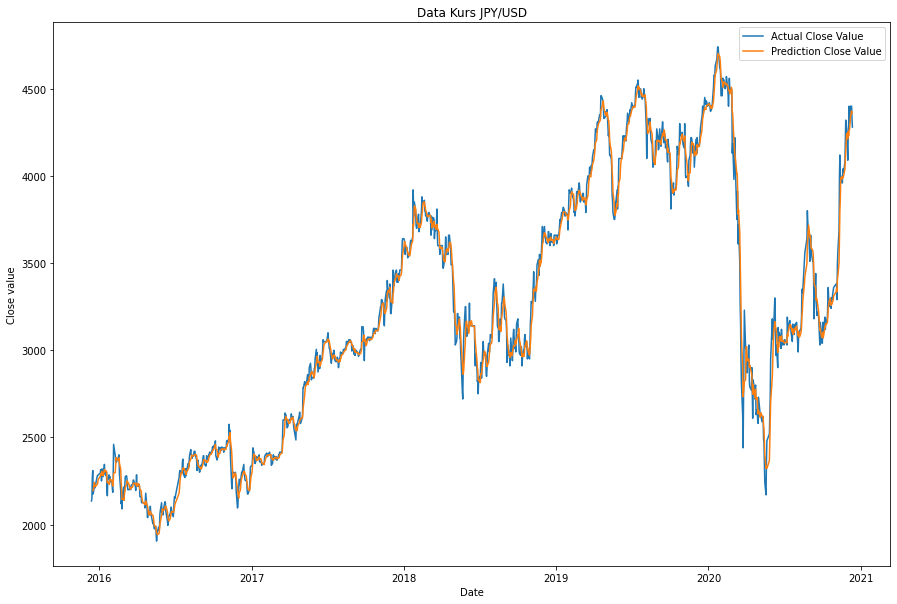

In [ ]:
grafik = []

indeks_prediksi = 0

#meng copy data tanggal
for x in range(SLIDE_WINDOWS-1,len(df_dataset)-1):
  
  temp = {'Date': datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'),'Close':list_prediksi[indeks_prediksi]}
  indeks_prediksi += 1 
  grafik.append(temp)

df_prediksi = pd.DataFrame(list(grafik))

#print(df_prediksi['Close'])

date=[]
close=[]

for x in range(len(df_dataset)):
  date.append(datetime.datetime.strptime(df_dataset.at[x,'Date'], '%Y-%m-%d'))
  close.append(df_dataset.at[x,'Close'])


plt.figure(figsize=(15,10))
plt.plot(date, close, label='Actual Close Value')
#plt.ylabel('Prediction Close')

plt.plot(df_prediksi['Date'], df_prediksi['Close'], label='Prediction Close Value')
plt.xlabel('Date')
plt.ylabel('Close value')
#plt.ylabel('Prediction Close')

plt.title('Data Kurs JPY/USD')
plt.legend()
plt.show()